# Busca de Encosta (Hill Climbing)
## Aluno: Marvson Allan

![Hill Climbing](https://images.unsplash.com/photo-1523653049681-701d71cf57c0?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MXwxfDB8MXxhbGx8fHx8fHx8fA&ixlib=rb-1.2.1&q=80&w=1080)

O algoritmo de hill climbing é um algoritmo de otimização ingênuo usado para melhorar uma solução de um problema iterativamente quando não se tem ideia de qual o estado terminal. Dessa forma, usando um conjunto de operadores, geramos novas soluções para o problema e avaliamos essas soluções. Enquanto pudermos melhorar a solução, o algoritmo continua. Quando não há uma solução melhor, o algoritmo para.

Um problema com o algoritmo de hill climbing são máximos locais.

![Máximos e Mínimos Locais](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/330px-Extrema_example_original.svg.png)

Um máximo local é uma solução que, em sua região do espaço de soluções, não existem soluções melhores próximas, no sentido de maximizar a avalição das soluções. Um máximo global (podem haver mais de um iguais) é a solução que maximiza a avaliação.

Outro problema são regiões planas, onde a avalição de todas as soluções próximas no espaço de soluções são iguais ou muito similares quanto a avaliação. Para evitar esses problemas, uma possibilidade é usar reinícios aleatórios.

## Formulação do Problema

O problema que será tratado com o algoritmo é o problema do caixeiro viajante. Suponha que temos um mapa de uma cidade onde é possível andar em linha reta entre quaisquer dois pontos de interesse da cidade. O desafio é encontrar uma permutação da ordem dos pontos de interesse que minimize a distância total percorrida, isto é, o menor caminho que liga todos os pontos, voltando para o ponto inicial.

Vamos estar solucionando o caso para um país africano chamado Djibouti.

![Djibouti](assets/Djibouti/map.jpg)

Vamos estar usando os pontos de interesse da imagem abaixo:

![Pontos de Interesse](assets/Djibouti/city-points.gif)

### Estado Inicial

Para nos permitir obter soluções melhores, vamos tentar mais de um estado inicial. A ideia é que, ao tentar múltiplos pontos iniciais, eventualmente vamos escolher um na encosta do mínimo global. O estado inicial trivial, que é basicamente a ordem dos pontos de interesse que recebemos, não é tão ruim como estado inicial. Isso será visto mais adiante.

### Operadores

Para esse problema vamos tentar dois operadores: a permutação de pontos vizinhos da solução, ou seja, dado dos pontos consecutivos na solução, vamos alterar a ordem deles. Ao aplicar esse operador numa solução, precisamos aplicar para cada par de pontos de interesse consecutivos, o que significa que o fator de expansão é o número de pontos de interesse.

O segundo operador será todas as permutações entre dois pontos de interesse diferentes. Por exemplo, se pegarmos o primeiro ponto de interesse da solução e trocarmos pelo quinto, é uma aplicação possível do operador.

### Avaliação

O problema que vamos resolver vem de uma base de dados para problemas do caixeiro viajante. Ao verificar as coordenadas dos pontos, é possível notar que não tem como esses números serem coordenadas geográficas, isso porque eles não são. As coordenadas que recebemos estão no formato EUC_2D (Euclidian Surface), o que significa que eles já são uma projeção do mapa num plano onde a distância euclidiana funciona. Então a avalição será simplesmente a distância euclidiana de todo o trajeto, do primeiro para o segundo ponto, somado à distância do segundo para o terceiro e assim por diante até somar a distância do último elemento de volta ao primeiro.

In [1]:
from src.hillclimbing import hill_climbing
from src.tsparser import parse
from src.plot import plot
from random import shuffle, seed

import src.tsp as tsp

seed(96)
problem = parse("./assets/Djibouti/euc-2d-nodes.tsp")

## Primeira Formulação

Para essa primeira formulação do problema, temos:

* **Estado Inicial**: Permutação aleatória dos pontos de interesse lidos do arquivo.
* **Operadores**: Troca de dois pontos de interesse consecutivos, aplicada a cada pair de pontos de interesse consecutivos da solução.
* **Função de Avaliação**: Distância total do trajeto, do primeiro ponto de interesse da solução, percorrendo um a um, até o último e então de volta ao primeiro.

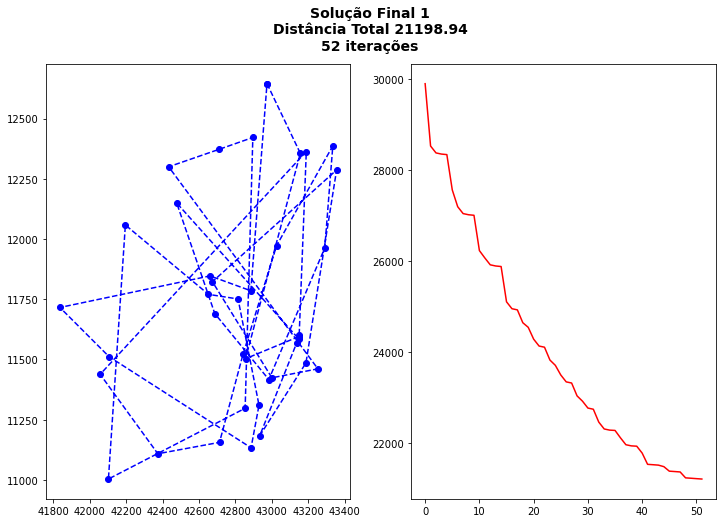

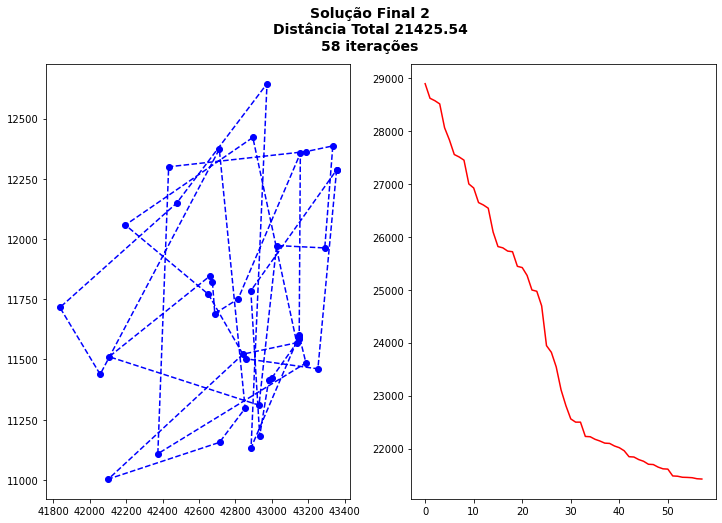

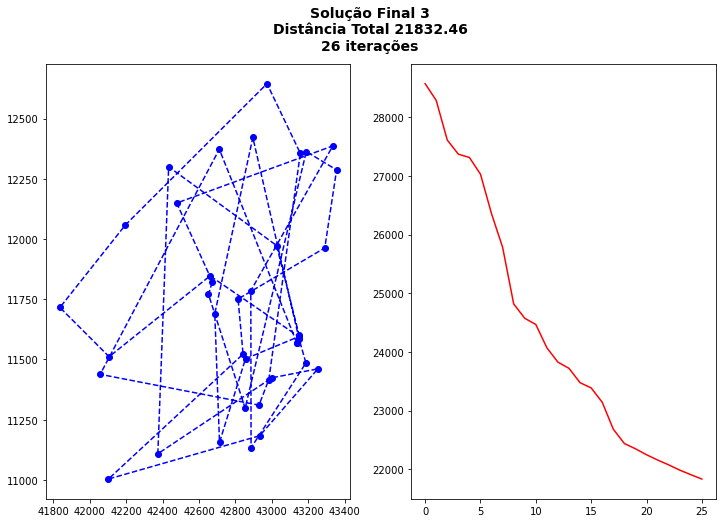

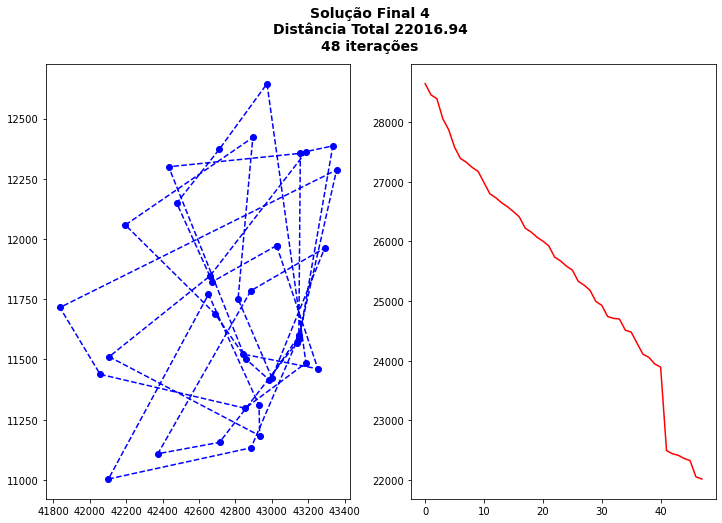

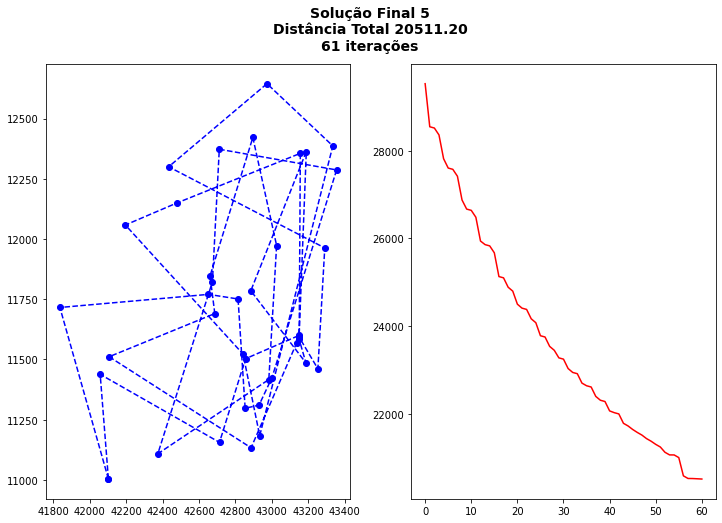

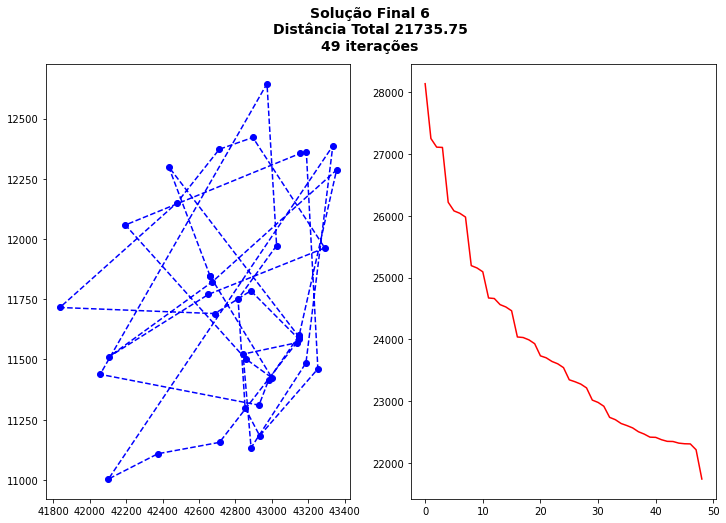

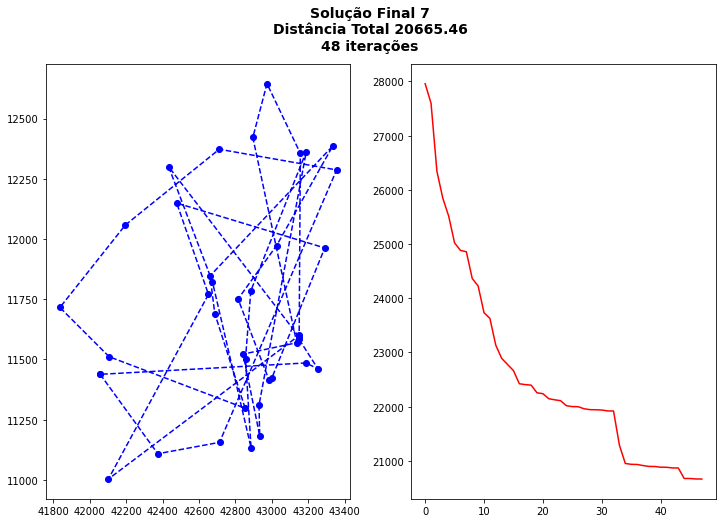

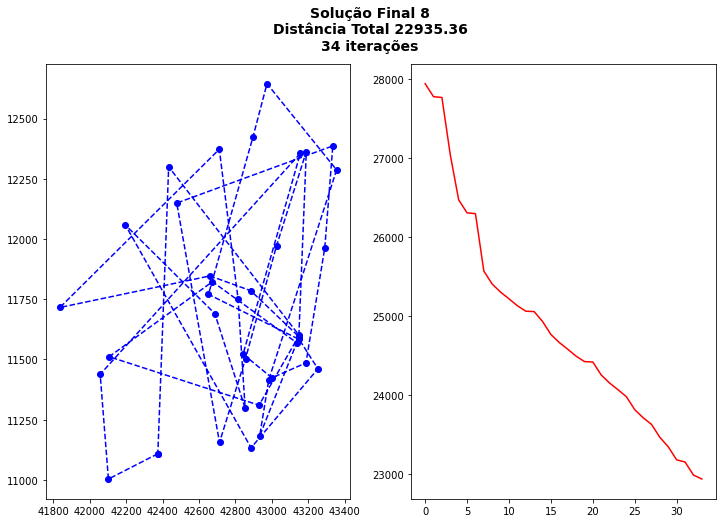

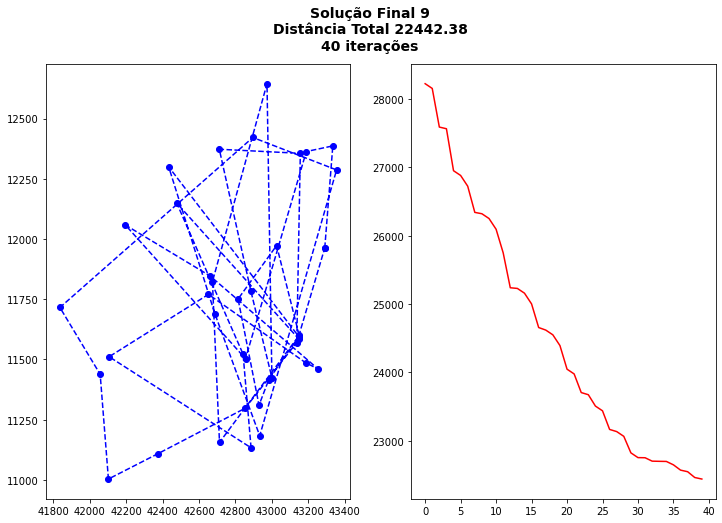

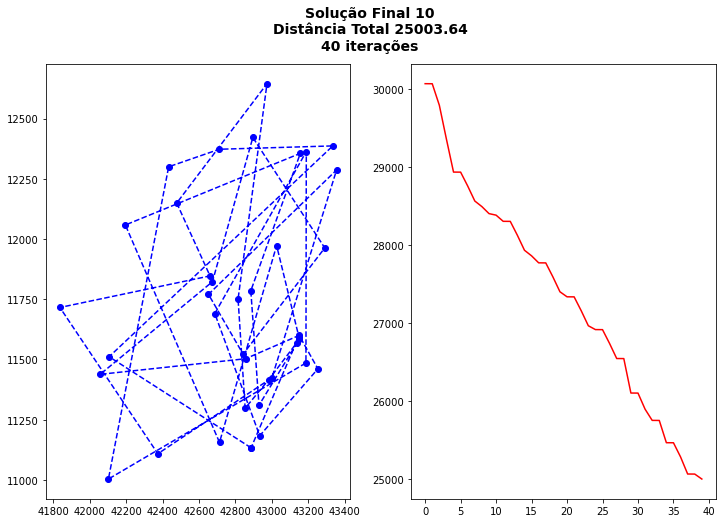

In [2]:
for i in range(10):
    initial = problem["point_list"][:]
    shuffle(initial)

    final, path = hill_climbing(initial, tsp.consecutive_swaps, tsp.evaluate, lambda x,y: x == y)
    trajectory_eval = [-tsp.evaluate(t) for t in path]
    plot(final, trajectory_eval, f"Solução Final {i + 1}\nDistância Total {-tsp.evaluate(final):.2f}\n{len(path)} iterações")

Os resultados não foram muito bons. Não é muito bom depender da sorte. Sabemos que o melhor resultado, para o caso de pontos no plano com distância euclidiana e todos os pontos tendo conexões entre sí, tem que ser o "contorno" dos pontos, onde nenhuma aresta da solução toca outra. Por incrível que pareça, o estado inicial dado simplesmente pela sequência lida do arquivo performa melhor:

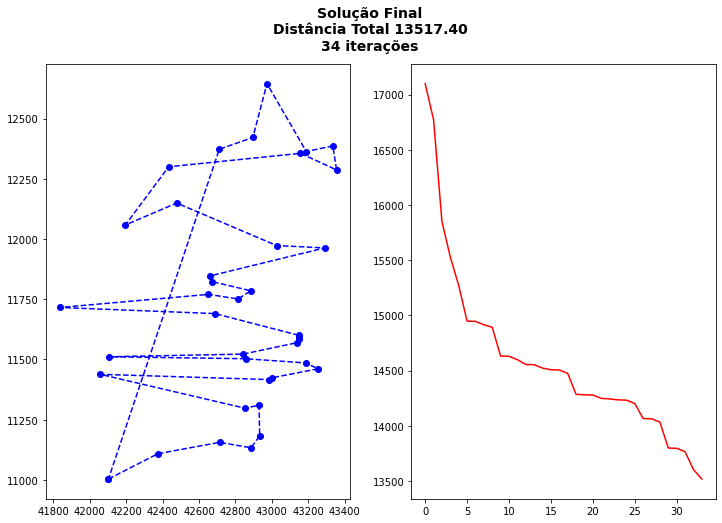

In [3]:
final, path = hill_climbing(problem["point_list"][:], tsp.consecutive_swaps, tsp.evaluate, lambda x,y: x == y)
trajectory_eval = [-tsp.evaluate(t) for t in path]
plot(final, trajectory_eval, f"Solução Final\nDistância Total {-tsp.evaluate(final):.2f}\n{len(path)} iterações")

## Segunda Formulação

Para essa segunda formulação do problema, temos:

* **Estado Inicial**: Permutação aleatória dos pontos de interesse lidos do arquivo.
* **Operadores**: Troca de dois pontos de interesse quaisquer da solução, aplicada a cada par de pontos de interesse diferentes da solução.
* **Função de Avaliação**: Distância total do trajeto, do primeiro ponto de interesse da solução, percorrendo um a um, até o último e então de volta ao primeiro.

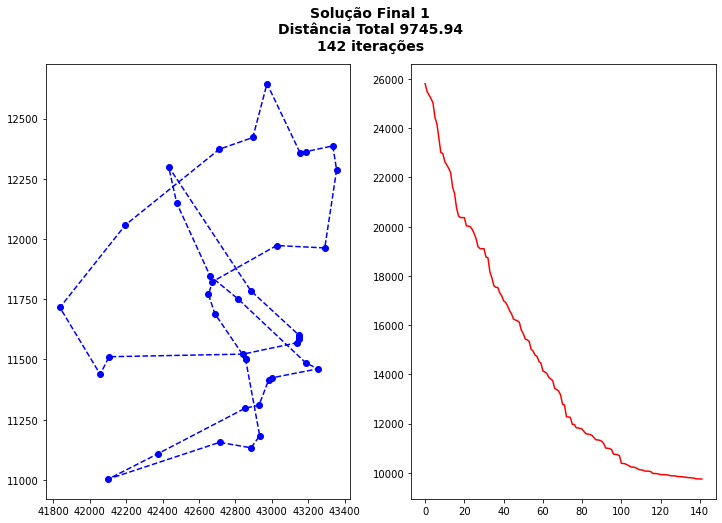

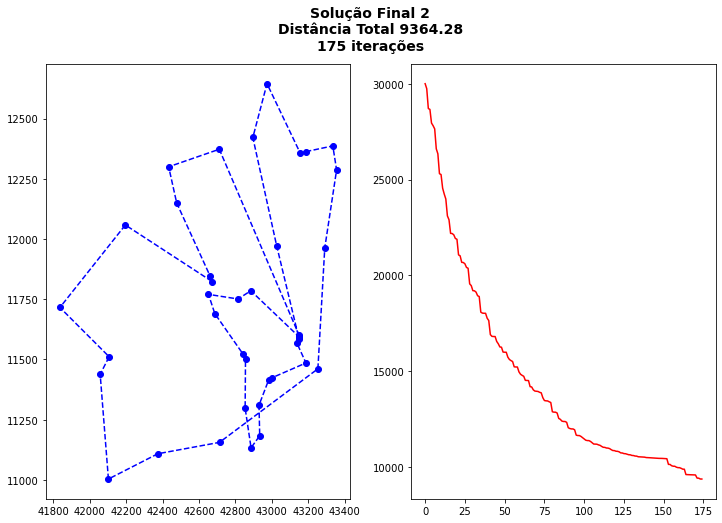

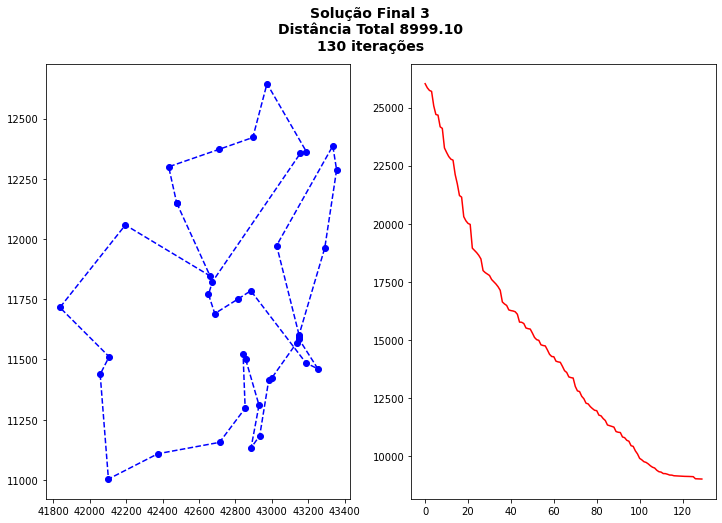

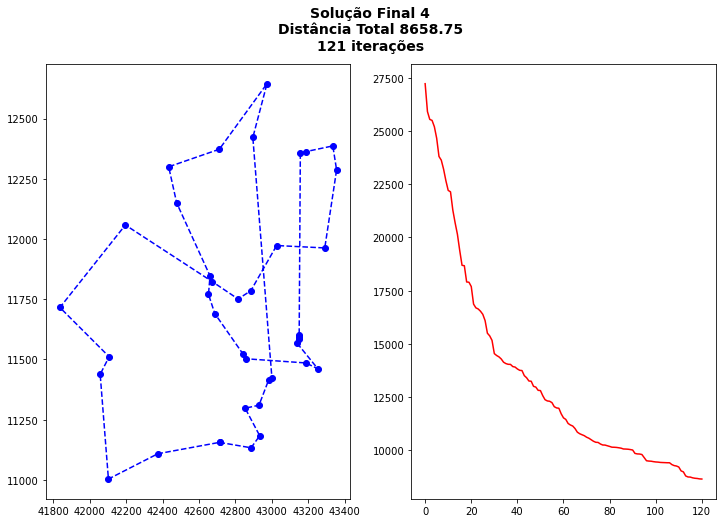

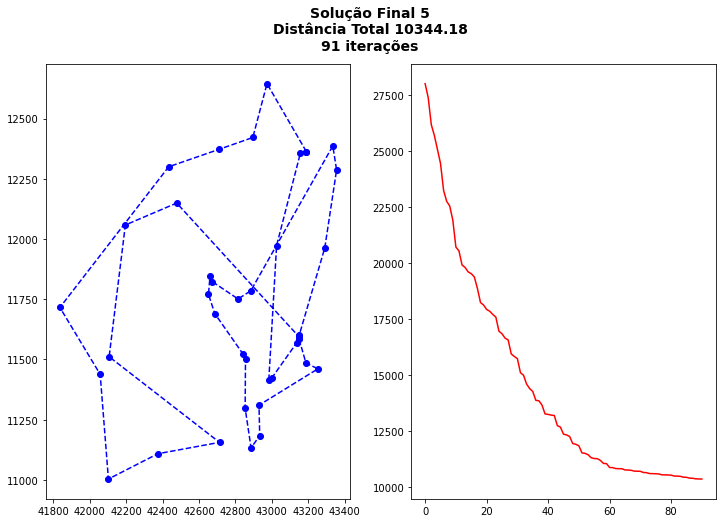

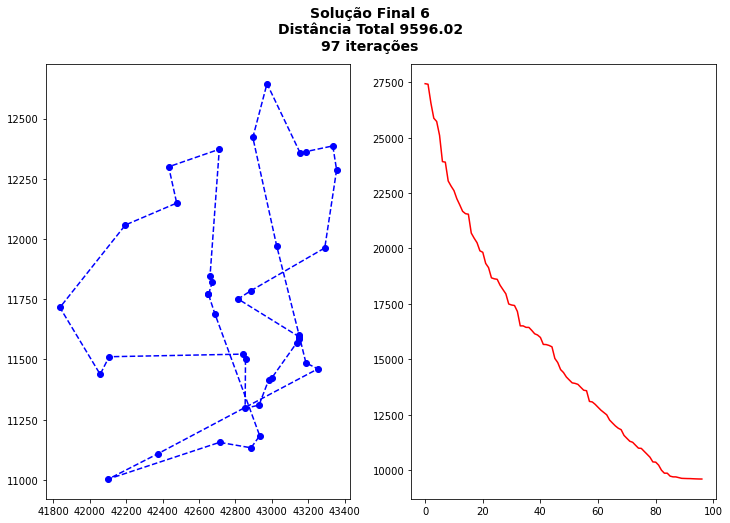

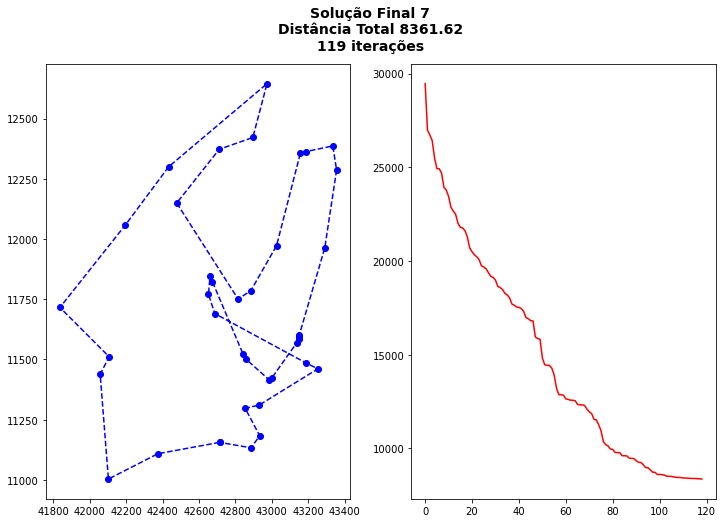

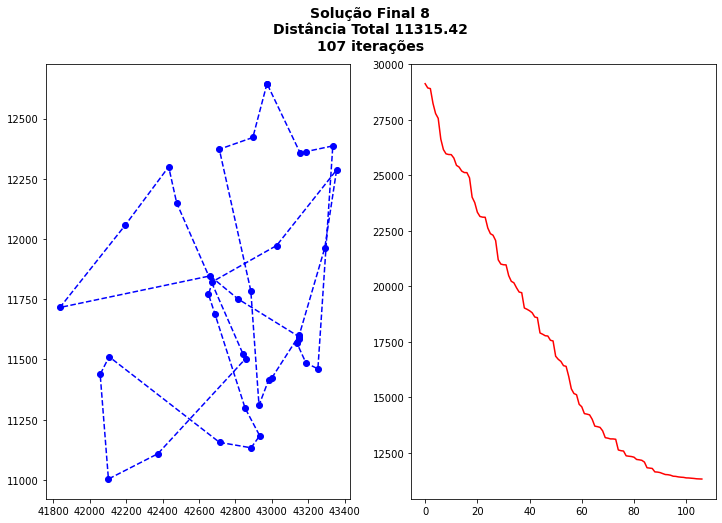

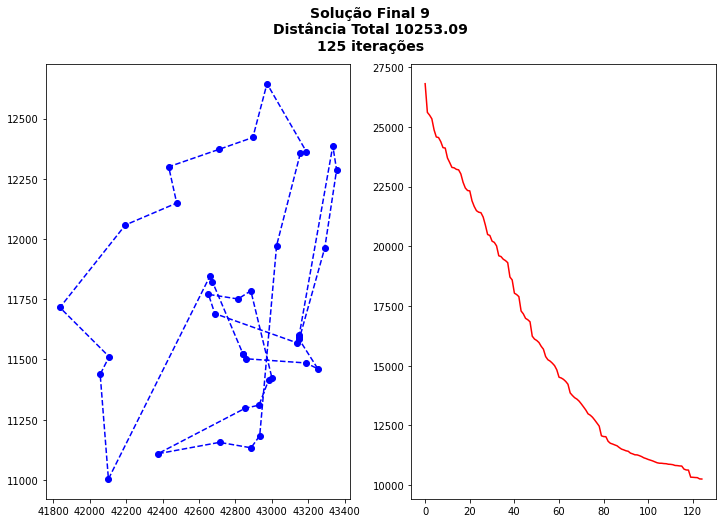

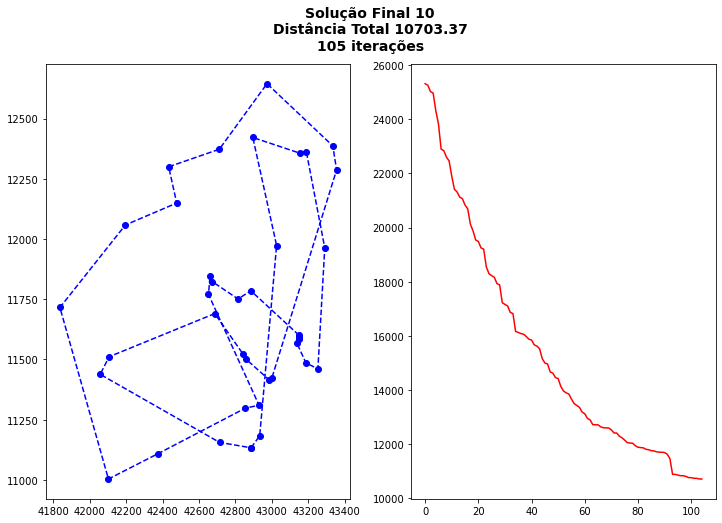

In [4]:
for i in range(10):
    initial = problem["point_list"][:]
    shuffle(initial)

    final, path = hill_climbing(initial, tsp.all_possible_swaps, tsp.evaluate, lambda x,y: x == y)
    trajectory_eval = [-tsp.evaluate(t) for t in path]
    plot(final, trajectory_eval, f"Solução Final {i + 1}\nDistância Total {-tsp.evaluate(final):.2f}\n{len(path)} iterações")

## Conclusão

Com esse novo operador, as coisas ficaram muito melhores! Compare as primeiras melhores soluções encontradas com a solução ótima:

![Solução Ótima](assets/Djibouti/best-path.gif)

Conseguimos reduções significativas comparado com a melhor solução, mas ainda assim, não foi o suficiente para encontrar a melhor solução. Também tivemos mais iterações, o que significa que o algoritmo ficou menos preso em máximos locais por ter mais opções.

Para conseguir resultados ainda melhores, vamos precisar de estados iniciais melhores, sorte, ou operadores melhores. Ou um algoritmo melhor. Tenho certeza que simulated annealing ou genetic algorithms teriam resultados melhores nessa situação. A dinâmica de poder piorar soluções para que uma melhor possa ser encontrada, para escapar de máximos locais, é algo que facilitaria muito a situação aqui.

## Outras cidades

Isso agora é um pouco além do escopo, mas estarei testando outro país: "Western Sahara".

### Sahara do Oeste

![Mapa](assets/WesternSahara/map.jpg)


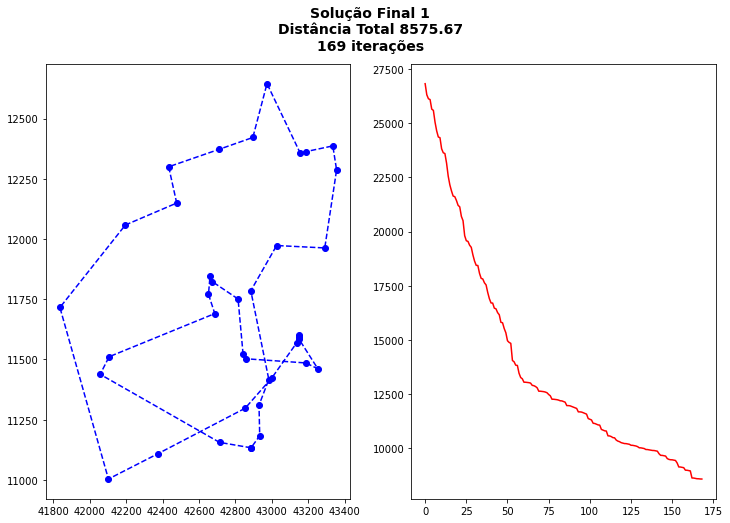

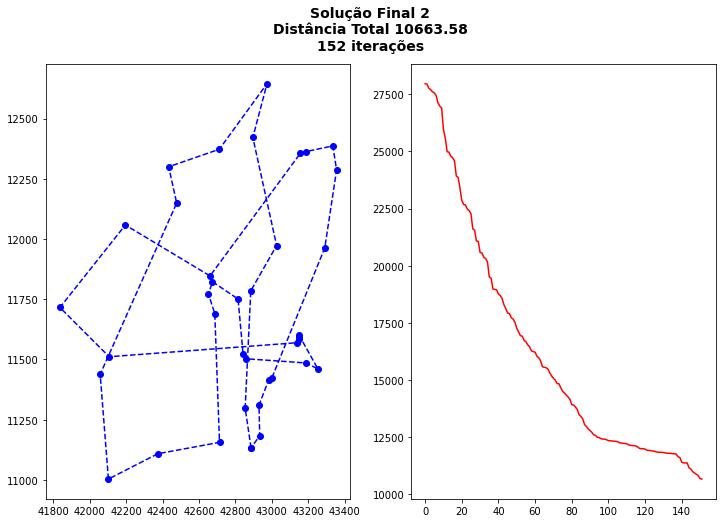

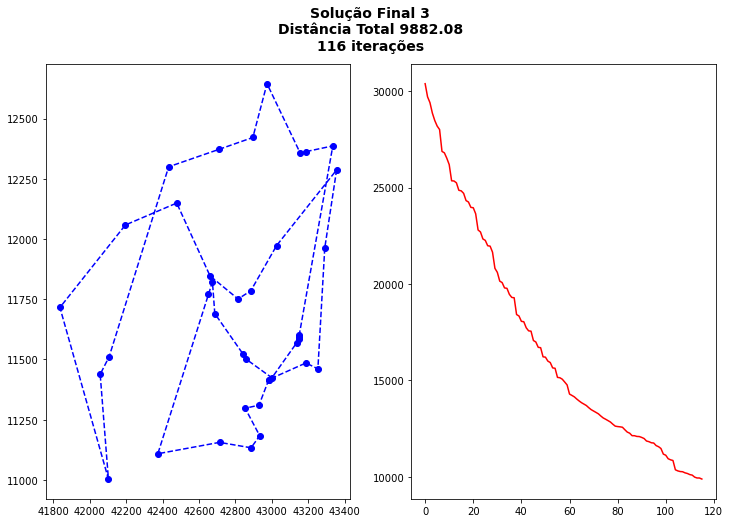

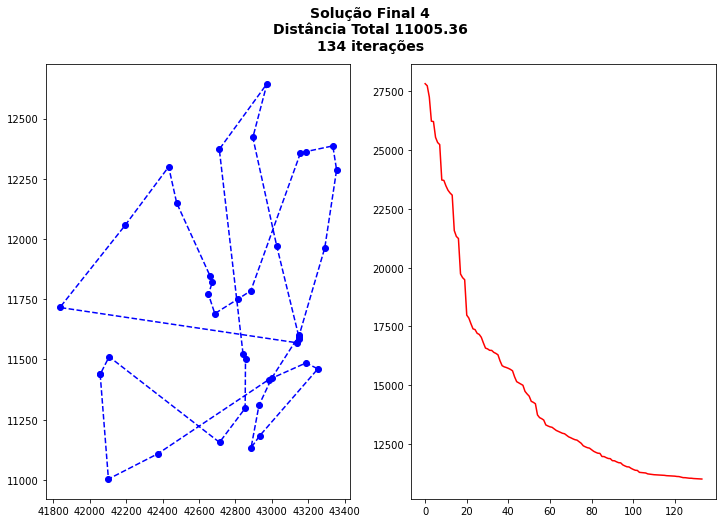

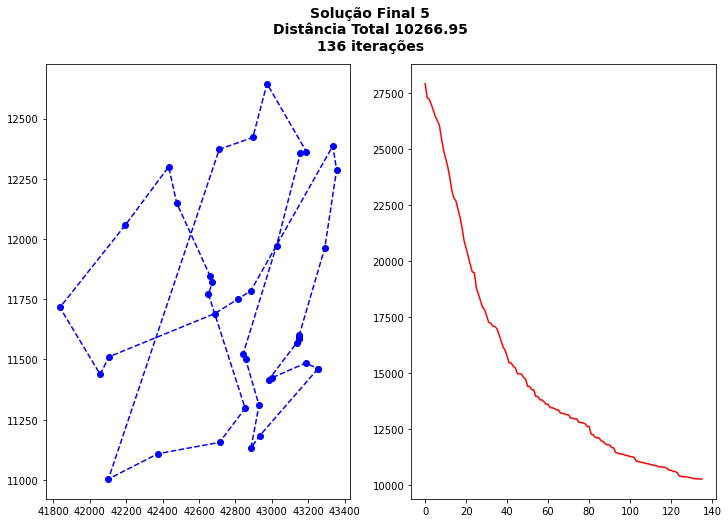

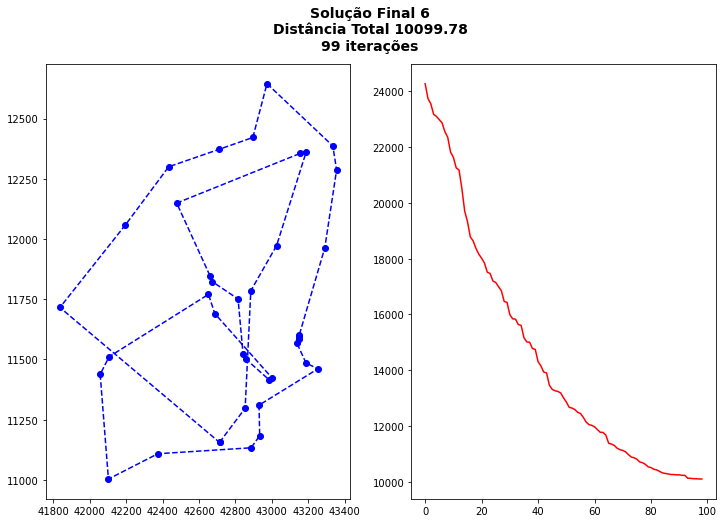

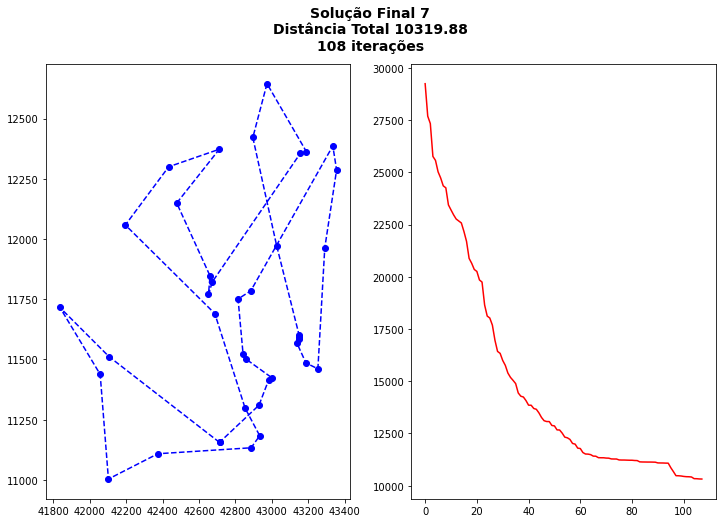

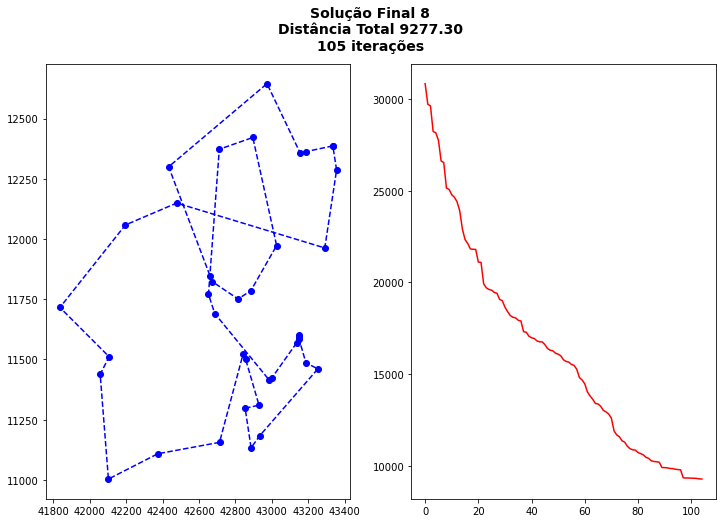

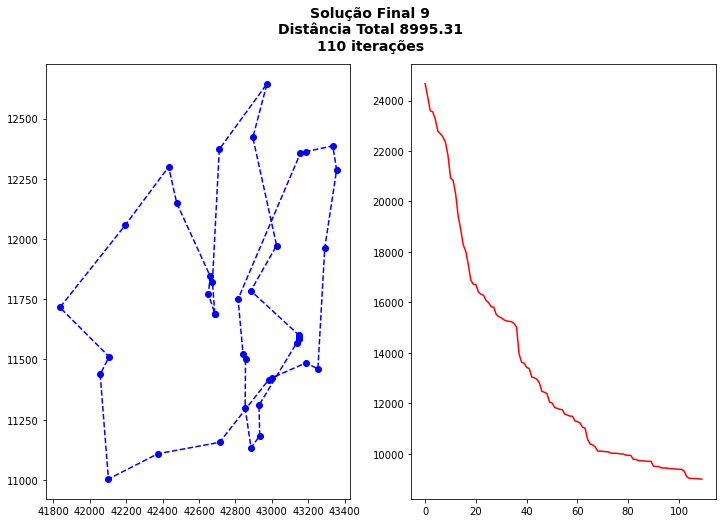

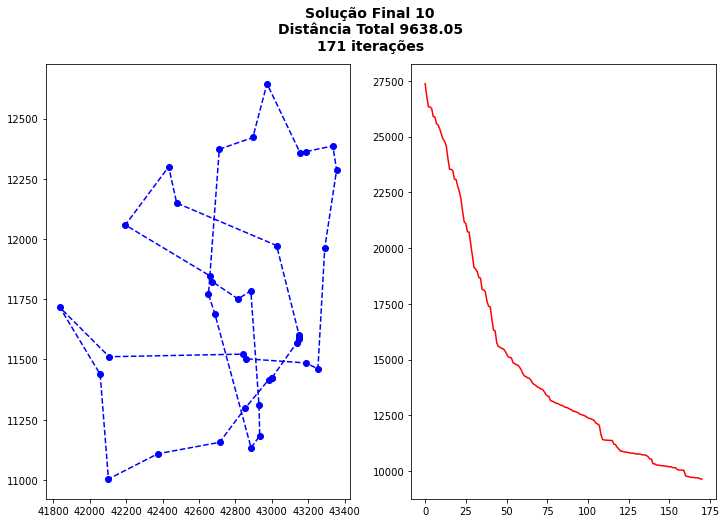

In [5]:
problem2 = parse("./assets/WesternSahara/euc-2d-nodes.tsp")

for i in range(10):
    initial = problem["point_list"][:]
    shuffle(initial)

    final, path = hill_climbing(initial, tsp.all_possible_swaps, tsp.evaluate, lambda x,y: x == y)
    trajectory_eval = [-tsp.evaluate(t) for t in path]
    plot(final, trajectory_eval, f"Solução Final {i + 1}\nDistância Total {-tsp.evaluate(final):.2f}\n{len(path)} iterações")

E a solução ótima desse país é:

![Melhor Solução](assets/WesternSahara/best-path.gif)